In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import joblib

In [95]:
pd.set_option("display.max_columns", None)

In [96]:
dataset, scaler = joblib.load("../data/dataset_draft5_5.pkl")

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gameId                     6884 non-null   object 
 1   Blue_Adc_assistsPerTime    6884 non-null   float64
 2   Blue_Adc_deathsPerTime     6884 non-null   float64
 3   Blue_Adc_killsPerTime      6884 non-null   float64
 4   Blue_Jgl_assistsPerTime    6884 non-null   float64
 5   Blue_Jgl_deathsPerTime     6884 non-null   float64
 6   Blue_Jgl_killsPerTime      6884 non-null   float64
 7   Blue_Mid_assistsPerTime    6884 non-null   float64
 8   Blue_Mid_deathsPerTime     6884 non-null   float64
 9   Blue_Mid_killsPerTime      6884 non-null   float64
 10  Blue_Spt_assistsPerTime    6884 non-null   float64
 11  Blue_Top_assistsPerTime    6884 non-null   float64
 12  Blue_Top_deathsPerTime     6884 non-null   float64
 13  Blue_Top_killsPerTime      6884 non-null   float

In [98]:
#dataset = pd.read_excel("../data/dataset_draft5_4.xlsx", index_col=0, dtype = {"gameId": "str"})
#dataset.info()

In [99]:
dataset["winner"].head()

0     Red
1    Blue
2     Red
3    Blue
4    Blue
Name: winner, dtype: object

In [100]:
label_incoder = LabelEncoder()
dataset["winner"] = label_incoder.fit_transform(dataset["winner"])
dataset["winner"].head()

0    1
1    0
2    1
3    0
4    0
Name: winner, dtype: int32

In [101]:
dropped_dataset = dataset.drop(["gameId"], axis=1)
desired_X_column_list = list(dropped_dataset.columns)
desired_X_column_list.remove("winner")
dropped_dataset.drop_duplicates(desired_X_column_list)
y = dropped_dataset["winner"]
X = dropped_dataset.drop(["winner"], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Blue_Adc_assistsPerTime    6884 non-null   float64
 1   Blue_Adc_deathsPerTime     6884 non-null   float64
 2   Blue_Adc_killsPerTime      6884 non-null   float64
 3   Blue_Jgl_assistsPerTime    6884 non-null   float64
 4   Blue_Jgl_deathsPerTime     6884 non-null   float64
 5   Blue_Jgl_killsPerTime      6884 non-null   float64
 6   Blue_Mid_assistsPerTime    6884 non-null   float64
 7   Blue_Mid_deathsPerTime     6884 non-null   float64
 8   Blue_Mid_killsPerTime      6884 non-null   float64
 9   Blue_Spt_assistsPerTime    6884 non-null   float64
 10  Blue_Top_assistsPerTime    6884 non-null   float64
 11  Blue_Top_deathsPerTime     6884 non-null   float64
 12  Blue_Top_killsPerTime      6884 non-null   float64
 13  Red_Adc_assistsPerTime     6884 non-null   float

In [102]:
X.describe()

,Blue_Adc_assistsPerTime,Blue_Adc_deathsPerTime,Blue_Adc_killsPerTime,Blue_Jgl_assistsPerTime,Blue_Jgl_deathsPerTime,Blue_Jgl_killsPerTime,Blue_Mid_assistsPerTime,Blue_Mid_deathsPerTime,Blue_Mid_killsPerTime,Blue_Spt_assistsPerTime,Blue_Top_assistsPerTime,Blue_Top_deathsPerTime,Blue_Top_killsPerTime,Red_Adc_assistsPerTime,Red_Adc_deathsPerTime,Red_Adc_killsPerTime,Red_Jgl_assistsPerTime,Red_Jgl_deathsPerTime,Red_Jgl_killsPerTime,Red_Mid_assistsPerTime,Red_Mid_deathsPerTime,Red_Mid_killsPerTime,Red_Spt_assistsPerTime,Red_Top_assistsPerTime,Red_Top_deathsPerTime,Red_Top_killsPerTime,Blue_Winrate,Red_Winrate,Blue_GoldDiff,Red_GoldDiff,Blue_KillDiff,Red_KillDiff,headtoHeadWinrate,headtoHeadGoldDiff,headtoHeadKillDiff,Top_wardsScorePerTimeDiff,Jgl_wardsScorePerTimeDiff,Mid_wardsScorePerTimeDiff,Adc_wardsScorePerTimeDiff,Spt_wardsScorePerTimeDiff,Spt_assistsPerTimeDiff,Top_kdaDiff,Top_killsPerTimeDiff,Top_deathsPerTimeDiff,Top_assistsPerTimeDiff,Top_creepScorePerTimeDiff,Top_goldEarnedPerTimeDiff,Jgl_kdaDiff,Jgl_killsPerTimeDiff,Jgl_deathsPerTimeDiff,Jgl_assistsPerTimeDiff,Jgl_creepScorePerTimeDiff,Jgl_goldEarnedPerTimeDiff,Mid_kdaDiff,Mid_killsPerTimeDiff,Mid_deathsPerTimeDiff,Mid_assistsPerTimeDiff,Mid_creepScorePerTimeDiff,Mid_goldEarnedPerTimeDiff,Adc_kdaDiff,Adc_killsPerTimeDiff,Adc_deathsPerTimeDiff,Adc_assistsPerTimeDiff,Adc_creepScorePerTimeDiff,Adc_goldEarnedPerTimeDiff,teamWinrateDiff,teamGoldDiff,teamKillDiff
count,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6.884000e+03,6.884000e+03,6.884000e+03,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6.884000e+03,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6.884000e+03,6.884000e+03,6.884000e+03
mean,-0.626434,-0.394958,0.889633,0.327401,0.388140,-0.566866,-0.328850,-0.177496,0.162073,1.304152,-0.757503,0.165824,-0.531795,-0.608790,-0.371788,0.950747,0.367155,0.401513,-0.549835,-0.299325,-0.159893,0.166566,1.337819,-0.715487,0.148670,-0.520480,0.006728,-0.006728,0.010885,-0.010885,0.012825,-0.012825,1.321172e-16,2.064331e-17,8.257324e-18,0.000442,-0.007143,-0.003457,0.003539,0.006620,-0.000029,-0.008115,-2.440825e-06,0.000009,-0.000040,0.007802,0.006013,-0.003166,-0.000006,-0.000005,-0.000037,0.001701,-0.000387,0.008547,0.000002,-0.000007,-0.000024,-0.005703,0.004503,0.002734,-0.000037,-0.000009,-0.000009,-0.003800,-0.010129,8.257324e-18,-1.238599e-17,-1.238599e-17
std,0.755780,1.103996,1.268400,1.031866,1.287807,0.930054,0.843047,1.136457,1.114657,1.286657,0.756676,1.159156,0.898877,0.757774,1.140267,1.301868,1.040093,1.326058,0.921703,0.866643,1.175644,1.093440,1.289490,0.760035,1.155715,0.900159,0.992868,1.007181,0.990022,1.009906,0.982249,1.017422,1.000073e+00,1.000073e+00,1.000073e+00,0.577407,0.721279,0.651520,0.884521,1.714675,0.002086,0.828195,8.315486e-04,0.000725,0.001264,0.975219,0.985469,1.023393,0.000853,0.000800,0.001651,0.795058,0.881673,1.052695,0.000989,0.000706,0.001396,1.004131,1.020631,1.076576,0.001166,0.000702,0.001246,1.187023,1.100108,1.000073e+00,1.000073e+00,1.000073e+00
min,-3.089099,-3.500985,-2.860579,-2.815120,-3.500985,-2.860579,-3.089099,-3.500985,-2.860579,-3.089099,-3.089099,-3.500985,-2.860579,-2.786417,-3.500985,-2.860579,-2.727944,-3.500985,-2.860579,-3.089099,-3.500985,-2.860579,-2.934819,-2.908522,-3.500985,-2.860579,-3.171250,-3.160045,-5.351753,-5.525716,-5.662345,-6.414518,-2.302890e+00,-3.624588e+00,-5.162957e+00,-3.593792,-2.896365,-4.840320,-4.565646,

In [103]:
#suffix_list = ["assistsPerTime", "deathsPerTime", "killsPerTime", "wardsScorePerTimeDiff", "assistsPerTimeDiff", "kdaDiff", "killsPerTimeDiff", "deathsPerTimeDiff", "assistsPerTimeDiff", "creepScorePerTimeDiff", "goldEarnedPerTimeDiff"]

In [104]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [105]:
#X_scaled

In [106]:
#for feature in X.columns:
    #scaler = StandardScaler()
    #X[feature] = scaler.fit_transform(X[feature].values.reshape(-1, 1))

In [107]:
#X.describe()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
X_train.describe()

,Blue_Adc_assistsPerTime,Blue_Adc_deathsPerTime,Blue_Adc_killsPerTime,Blue_Jgl_assistsPerTime,Blue_Jgl_deathsPerTime,Blue_Jgl_killsPerTime,Blue_Mid_assistsPerTime,Blue_Mid_deathsPerTime,Blue_Mid_killsPerTime,Blue_Spt_assistsPerTime,Blue_Top_assistsPerTime,Blue_Top_deathsPerTime,Blue_Top_killsPerTime,Red_Adc_assistsPerTime,Red_Adc_deathsPerTime,Red_Adc_killsPerTime,Red_Jgl_assistsPerTime,Red_Jgl_deathsPerTime,Red_Jgl_killsPerTime,Red_Mid_assistsPerTime,Red_Mid_deathsPerTime,Red_Mid_killsPerTime,Red_Spt_assistsPerTime,Red_Top_assistsPerTime,Red_Top_deathsPerTime,Red_Top_killsPerTime,Blue_Winrate,Red_Winrate,Blue_GoldDiff,Red_GoldDiff,Blue_KillDiff,Red_KillDiff,headtoHeadWinrate,headtoHeadGoldDiff,headtoHeadKillDiff,Top_wardsScorePerTimeDiff,Jgl_wardsScorePerTimeDiff,Mid_wardsScorePerTimeDiff,Adc_wardsScorePerTimeDiff,Spt_wardsScorePerTimeDiff,Spt_assistsPerTimeDiff,Top_kdaDiff,Top_killsPerTimeDiff,Top_deathsPerTimeDiff,Top_assistsPerTimeDiff,Top_creepScorePerTimeDiff,Top_goldEarnedPerTimeDiff,Jgl_kdaDiff,Jgl_killsPerTimeDiff,Jgl_deathsPerTimeDiff,Jgl_assistsPerTimeDiff,Jgl_creepScorePerTimeDiff,Jgl_goldEarnedPerTimeDiff,Mid_kdaDiff,Mid_killsPerTimeDiff,Mid_deathsPerTimeDiff,Mid_assistsPerTimeDiff,Mid_creepScorePerTimeDiff,Mid_goldEarnedPerTimeDiff,Adc_kdaDiff,Adc_killsPerTimeDiff,Adc_deathsPerTimeDiff,Adc_assistsPerTimeDiff,Adc_creepScorePerTimeDiff,Adc_goldEarnedPerTimeDiff,teamWinrateDiff,teamGoldDiff,teamKillDiff
count,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4.818000e+03,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4.818000e+03,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000
mean,-0.624400,-0.387854,0.890937,0.338202,0.390992,-0.566790,-0.326356,-0.154509,0.182705,1.315141,-0.743763,0.172819,-0.524841,-0.610782,-0.367062,0.962943,0.370918,0.404211,-0.557332,-0.293622,-0.154352,0.156370,1.339532,-0.716270,0.154157,-0.521268,0.000626,-0.002541,0.001731,-0.007454,0.004650,-0.011853,-0.015387,-0.013382,-0.015186,0.004273,-0.004904,-0.009278,0.005273,0.010409,-0.000017,0.000985,2.980654e-06,0.000010,-0.000021,-0.004812,0.007163,0.000981,-1.140816e-06,-0.000005,-0.000028,0.009893,0.007383,0.010742,0.000024,0.000001,-0.000028,-0.015693,0.007190,-0.002930,-0.000045,-0.000008,-0.000004,-0.013986,-0.017605,-0.007515,-0.009084,-0.006557
std,0.752251,1.108352,1.251125,1.029795,1.287901,0.925719,0.835679,1.148047,1.118482,1.269342,0.753095,1.165729,0.903635,0.755664,1.138662,1.296855,1.039329,1.324492,0.921422,0.869932,1.164813,1.087440,1.291131,0.764083,1.157717,0.891642,0.996111,1.008159,0.991271,1.004678,0.976800,1.003943,0.997601,0.996907,0.994864,0.579739,0.721422,0.643011,0.877047,1.699093,0.002059,0.825293,8.234684e-04,0.000726,0.001268,0.981162,0.986949,1.025006,8.471362e-04,0.000815,0.001648,0.793399,0.876899,1.046775,0.000983,0.000711,0.001384,0.973950,0.994656,1.069035,0.001149,0.000704,0.001240,1.192278,1.098327,1.006408,1.003527,0.993661
min,-3.089099,-3.500985,-2.654316,-2.614248,-3.500985,-2.860579,-3.089099,-3.500985,-2.860579,-3.089099,-3.089099,-3.500985,-2.860579,-2.786417,-3.500985,-2.860579,-2.693341,-3.500985,-2.860579,-2.965915,-3.500985,-2.860579,-2.934819,-2.898790,-3.500985,-2.860579,-3.066676,-3.120030,-5.351753,-5.355703,-5.402686,-6.414518,-2.302890,-3.624588,-5.162957,-3.593792,-2.896365,-4.840320,-4.308512,-8.424077,-0.008015,-3.353833,-3.333930e-03,-0.003486,-0

In [110]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6205227492739593


In [111]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'colsample_bytree': [0.3, 0.7]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

# 최적의 하이퍼파라미터로 모델 재학습
best_model = grid_search.best_estimator_

# 예측
y_pred_best = best_model.predict(X_test)

# 정확도 출력
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"mse with tuned parameters: {mse_best:.4f}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
mse with tuned parameters: 0.3475


In [112]:
print(accuracy_score(y_test, y_pred_best))

0.6524685382381413


In [113]:
# 아직 5_2_2 스케일러 다 전달 안 함

In [114]:
joblib.dump((best_model, scaler, X.columns), '../data/model_draft5_5_1.pkl')

['../data/model_draft5_5_1.pkl']

In [115]:
feature_importances = best_model.feature_importances_
features = list(X.columns)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_10_features = importance_df

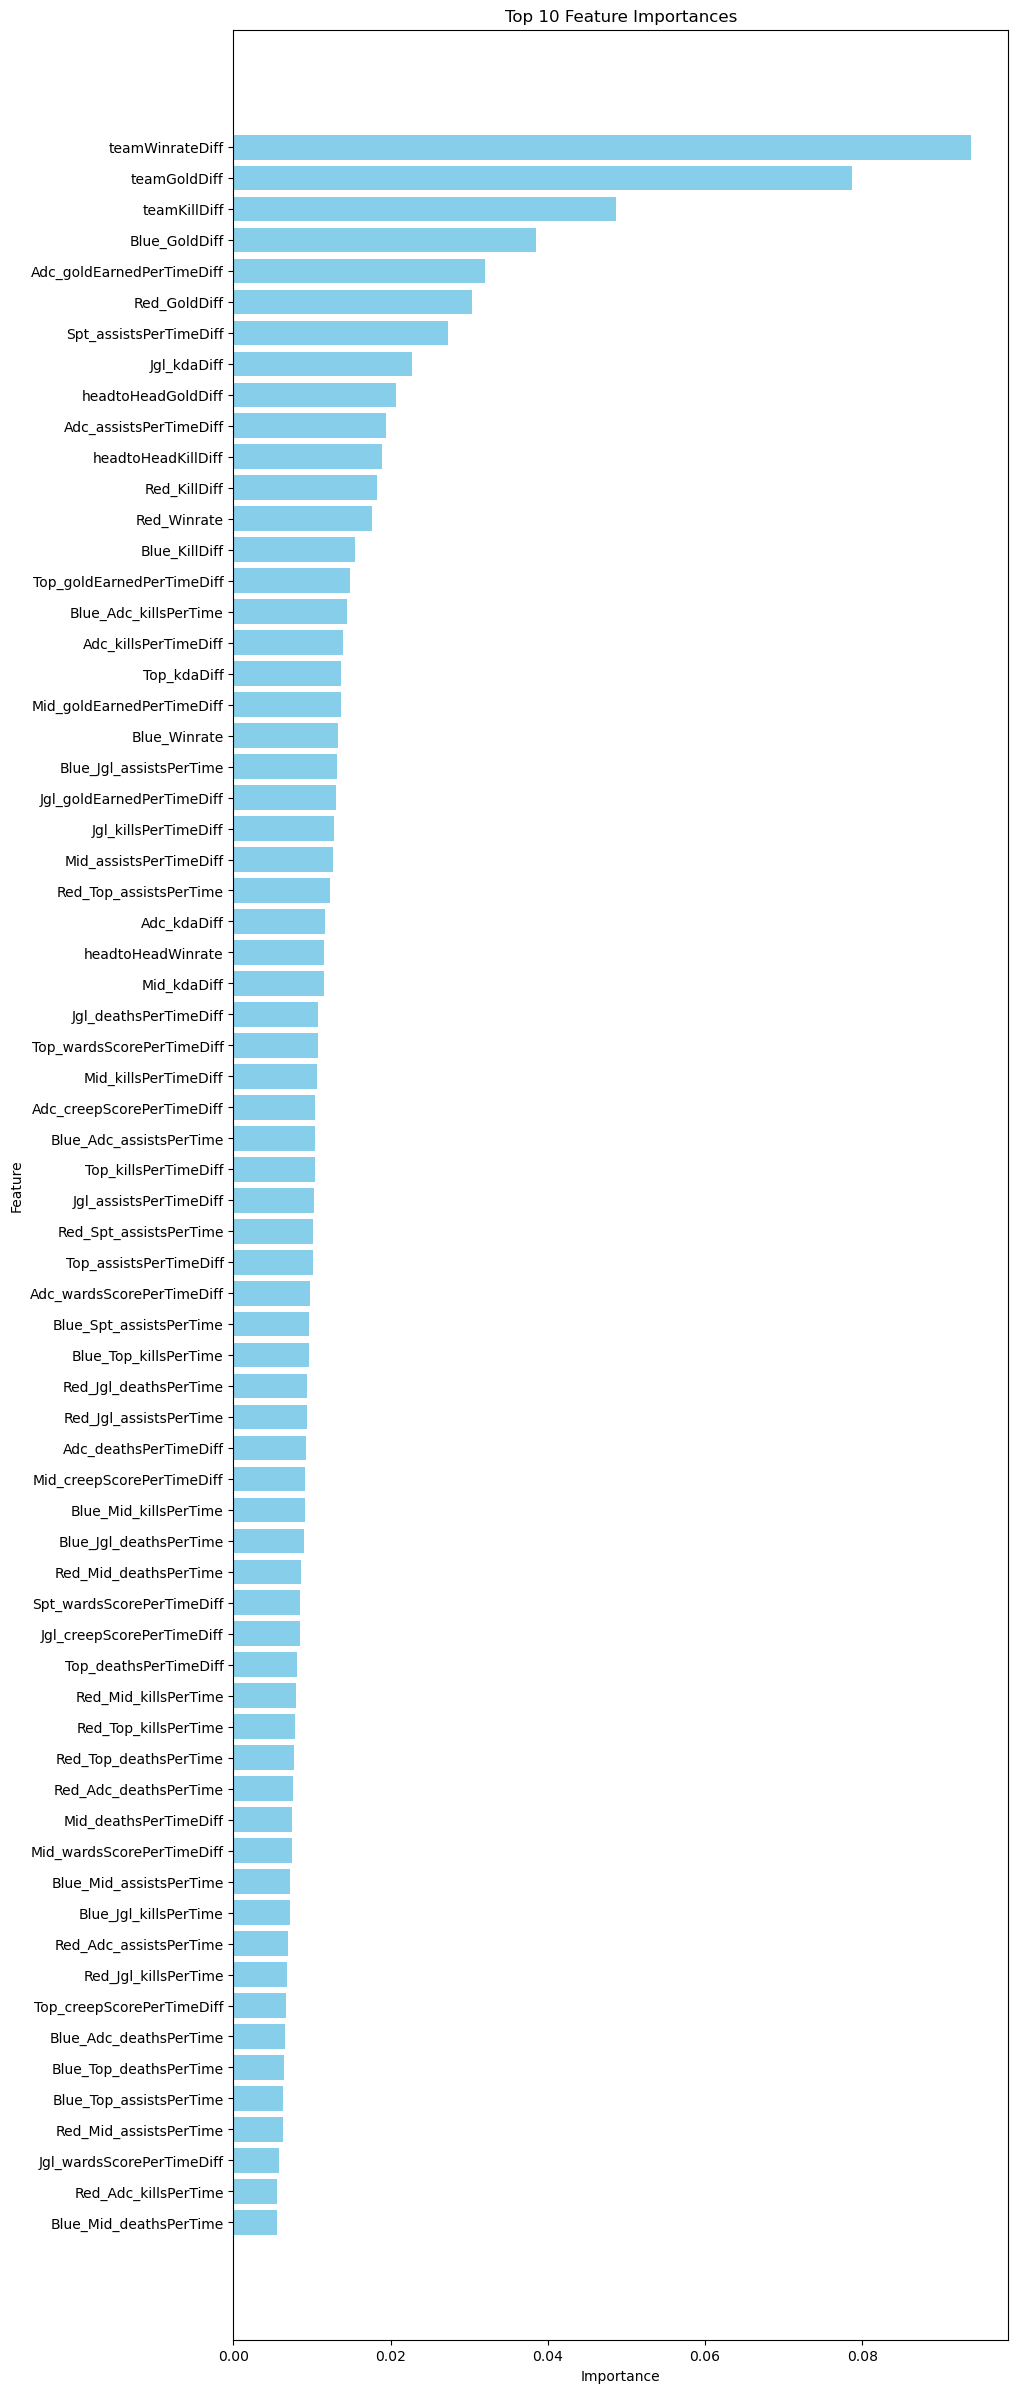

In [116]:
plt.figure(figsize=(10, 30))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()